# Regional Sales Analysis
The aim of this project is to analyze the regional sales data of a company from 2014 to 2018 in order to identify trends, key revenue drivers, and improvement areas. The analysis focuses on revenue, profit, product performance, customer contribution, and regional dynamics to support data-driven decision-making.






#Data Loading and Initial Inspection

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [ ]:
#Assigning dataframes to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_regions = sheets['Regions']
df_state_regions = sheets['State Regions']
df_products = sheets['Products']
df_budgets = sheets['2017 Budgets']

In [ ]:
#Viewing first five rows of sales

df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
#Viewing first five rows of all dataframes

print("\n— df_sales—")
display(df_sales.head())
print()

print("\n— df_customers —")
display(df_customers.head())
print()

print("\n— df_products—")
display(df_products.head())
print()

print("\n— df_regions—")
display(df_regions.head())
print()

print("\n— df_state_regions—")
display(df_state_regions.head())
print()

print("\n— df_budgets-")
display(df_budgets.head())


— df_sales—


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270




— df_customers —


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd




— df_products—


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5




— df_regions—


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago




— df_state_regions—


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West




— df_budgets-


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
#Replacing default headers in df_state_regions with the first row values and resetting the index


new_header = df_state_regions.iloc[0]
df_state_regions.columns = new_header
df_state_regions = df_state_regions[1:].reset_index(drop = True)

df_state_regions.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
#Checking the dimensions of all loaded dataframes

print(f"df_sales shape: {df_sales.shape}")
print(f"df_customers shape: {df_customers.shape}")
print(f"df_regions shape: {df_regions.shape}")
print(f"df_state_regions shape: {df_state_regions.shape}")
print(f"df_products shape: {df_products.shape}")
print(f"df_budgets shape: {df_budgets.shape}")

df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_regions shape: (994, 15)
df_state_regions shape: (48, 3)
df_products shape: (30, 2)
df_budgets shape: (30, 2)


In [ ]:
#Null Value Check

df_sales.isna().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
# Checking duplicate values
len(df_sales) == len(df_sales.drop_duplicates())

True

#Data Cleaning and Wrangling

In [ ]:
#Merging with customers

df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
)

#Merging with products

df = df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)

#Merging with regions

df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
)

#Merging with state_regions

df = df.merge(
    df_state_regions[['State Code', 'Region']],
    how = 'left',
    left_on = 'state_code',
    right_on = 'State Code'
)

#Merging with budget

df = df.merge(
    df_budgets,
    how = 'left',
    on = 'Product Name'
)

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [ ]:
#Modifying column names to lower case for easier access

df.columns = df.columns.str.lower()
df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer index', 'customer names',
       'index', 'product name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'state code', 'region', '2017 budgets'],
      dtype='object')

In [ ]:
#Keeping the columns important for analaysis

cols_to_keep = ['ordernumber', 'orderdate', 'channel', 'order quantity', 'unit price',
                'line total', 'total unit cost', 'customer names', 'product name', 'state_code',
                'county', 'state', 'latitude', 'longitude', 'region', '2017 budgets', 'population']
df = df[cols_to_keep]
df.head()

,ordernumber,orderdate,channel,order quantity,unit price,line total,total unit cost,customer names,product name,state_code,county,state,latitude,longitude,region,2017 budgets,population
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,GA,Chatham County,Georgia,32.08354,-81.09983,South,964940.231,145674
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,IN,Johnson County,Indiana,39.61366,-86.10665,Midwest,2067108.120,55586
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,CA,Alameda County,California,37.66243,-121.87468,West,5685138.270,79510
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,IN,Monroe County,Indiana,39.16533,-86.52639,Midwest,889737.555,84067
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,CT,Hartford County,Connecticut,41.77524,-72.52443,Northeast,1085037.329,58007


In [ ]:
#Renaming the columns for easier analysis

df.rename(columns = {'ordernumber':'order_number',
                     'orderdate':'order_date',
                     'order quantity':'order_quantity',
                     'unit price':'unit_price',
                     'line total':'revenue',
                     'total unit cost':'total_unit_cost',
                     'customer names':'customer_names',
                     'product name':'product_name',
                     '2017 budgets':'budget'}, inplace = True)
df.head()

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,state_code,county,state,latitude,longitude,region,budget,population
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,GA,Chatham County,Georgia,32.08354,-81.09983,South,964940.231,145674
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,IN,Johnson County,Indiana,39.61366,-86.10665,Midwest,2067108.120,55586
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,CA,Alameda County,California,37.66243,-121.87468,West,5685138.270,79510
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,IN,Monroe County,Indiana,39.16533,-86.52639,Midwest,889737.555,84067
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,CT,Hartford County,Connecticut,41.77524,-72.52443,Northeast,1085037.329,58007


In [ ]:
#Blanking out the budget for years other than 2017

df['budget'] = np.where(df['order_date'].dt.year != 2017, pd.NA, df['budget'])
df.head()

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,state_code,county,state,latitude,longitude,region,budget,population
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,GA,Chatham County,Georgia,32.08354,-81.09983,South,<NA>,145674
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,IN,Johnson County,Indiana,39.61366,-86.10665,Midwest,<NA>,55586
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,CA,Alameda County,California,37.66243,-121.87468,West,<NA>,79510
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,IN,Monroe County,Indiana,39.16533,-86.52639,Midwest,<NA>,84067
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,CT,Hartford County,Connecticut,41.77524,-72.52443,Northeast,<NA>,58007


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   channel          64104 non-null  object        
 3   order_quantity   64104 non-null  int64         
 4   unit_price       64104 non-null  float64       
 5   revenue          64104 non-null  float64       
 6   total_unit_cost  64104 non-null  float64       
 7   customer_names   64104 non-null  object        
 8   product_name     64104 non-null  object        
 9   state_code       64104 non-null  object        
 10  county           64104 non-null  object        
 11  state            64104 non-null  object        
 12  latitude         64104 non-null  float64       
 13  longitude        64104 non-null  float64       
 14  region           64104 non-null  objec

In [ ]:
#Checking for missing values in each column

df.isna().sum()

,0
order_number,0
order_date,0
channel,0
order_quantity,0
unit_price,0
revenue,0
total_unit_cost,0
customer_names,0
product_name,0
state_code,0


#Feature Engineering

In [ ]:
#Calculating total cost, profit, and profit margin percentage for further analysis

df['total_cost'] = df['order_quantity']*df['total_unit_cost']
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_percentage'] = df['profit'] / df['revenue']*100

df.head()

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,state_code,county,state,latitude,longitude,region,budget,population,total_cost,profit,profit_margin_percentage
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,GA,Chatham County,Georgia,32.08354,-81.09983,South,<NA>,145674,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,IN,Johnson County,Indiana,39.61366,-86.10665,Midwest,<NA>,55586,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,CA,Alameda County,California,37.66243,-121.87468,West,<NA>,79510,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,IN,Monroe County,Indiana,39.16533,-86.52639,Midwest,<NA>,84067,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,CT,Hartford County,Connecticut,41.77524,-72.52443,Northeast,<NA>,58007,10082.160,8249.040,45.0


In [ ]:
#Saving the pre-processed dataframe
#Exporting Final DataFrame to CSV
df.to_csv('Sales_data.csv', index=False)

#Exploratory Data Analysis

**1. Monthly Sales Trend Over Time**  
Aim: To track revenue trends over time using line chart, to detect seasonality or sales spikes.

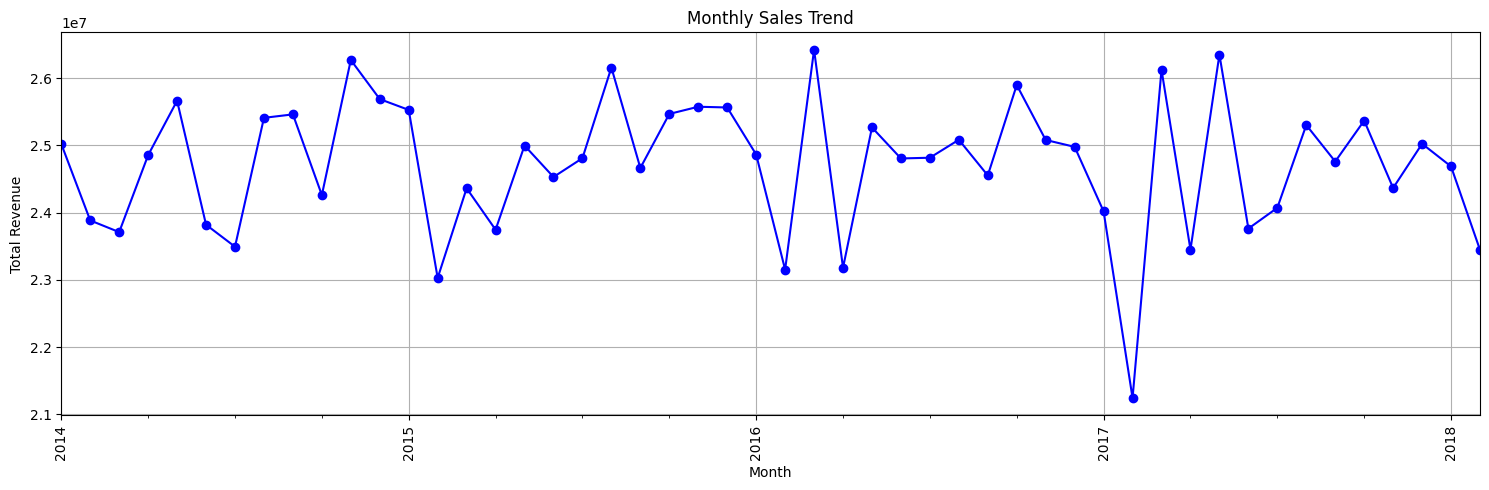

In [ ]:
#Converting order_date to monthly period (e.g. 2025-01, 2025-02)
df['order_month'] = df['order_date'].dt.to_period('M')

#Calculating total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

#Plotting monthly sales trends
plt.figure(figsize=(15,5))
monthly_sales.plot(marker = 'o', color = 'blue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Trend')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.grid(True)
plt.show()

**Insights**  
Sales follow a consistent seasonal trend, with peaks in May-June and dips in January-February every year.
The overall revenue stays around 24-26 M USD monthly, showing a stable yearly pattern.
However, the sharp revenue drop in early 2017 stands out as an outlier, which requires investigation into potential causes such as market disruptions or mistimed promotions.

**2. Monthly Sales Trend (All Years Combined)**  
Aim: To highlight overall seasonality patterns by aggregating sales across all years for each calendar month, using linechart.

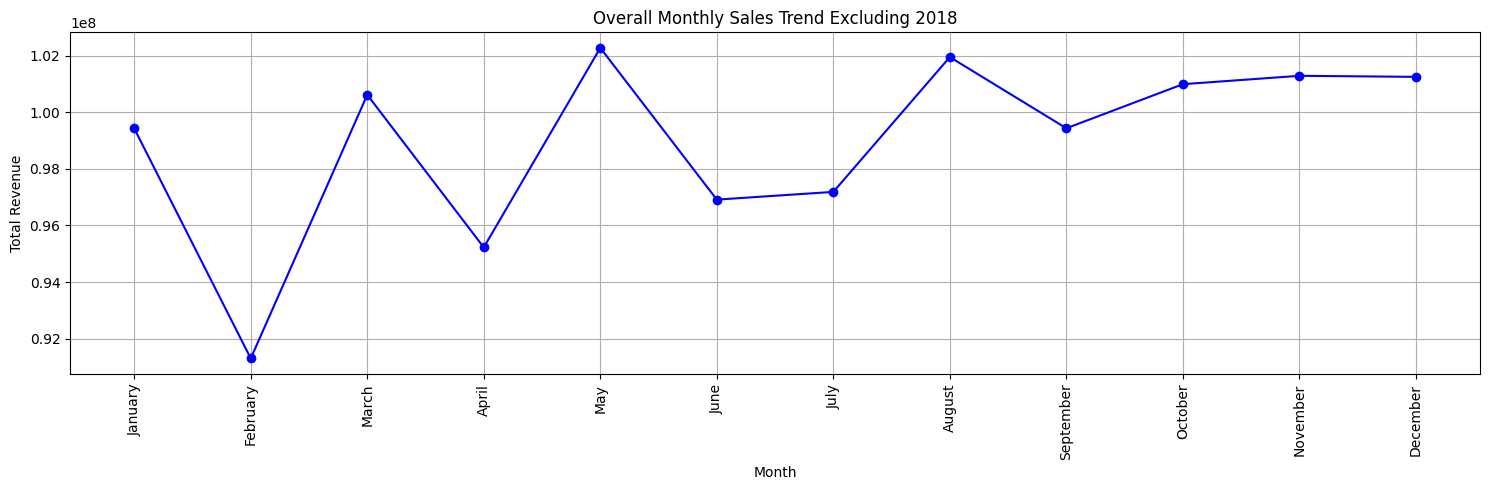

In [ ]:
#Extracting month name and month number from order date
df['order_month_name'] = df['order_date'].dt.month_name()
df['order_month_num'] = df['order_date'].dt.month

# Filtering out 2018 orders to exclude any partial year data so that monthly
# totals are not skewed by any incomplete year data
df2 = df[df['order_date'].dt.year != 2018]

#Calculating total revenue for each month
monthly_sales = df2.groupby(['order_month_num', 'order_month_name'])['revenue'].sum().reset_index().sort_values(by = 'order_month_num')

#Plotting monthly sales trend for combined years
plt.figure(figsize = (15,5))
plt.plot(monthly_sales['order_month_name'], monthly_sales['revenue'], marker = 'o', color = 'blue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Overall Monthly Sales Trend Excluding 2018')
plt.xticks(rotation = 90)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights**    
Sales start strong in January (~99 M USD), rise and dip slightly from Feb-August, and pick up again in September. The last quarter of the year (October-December) consistently sees high revenue. This suggests a pattern of early-year momentum, mid-year slowdown, and a solid finish each year.

**3. Top 10 Products By Revenue**   
Aim: To identify the highest-grossing products using horizontal bar chart, to focus on marketing and inventory efforts.

/tmp/ipython-input-22-2621216562.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


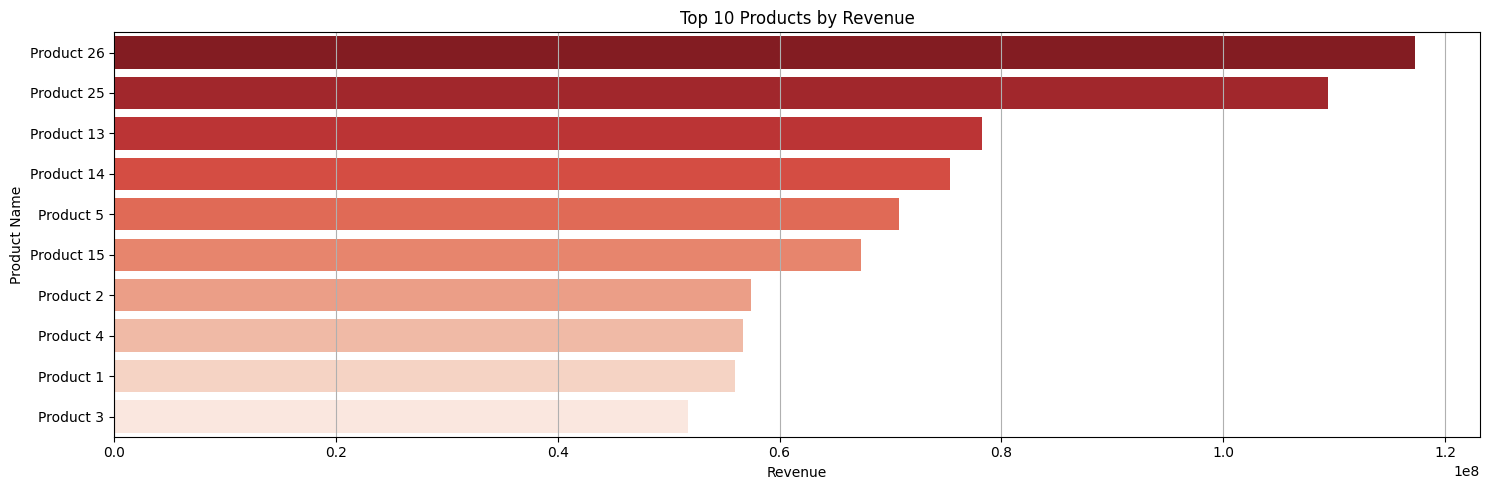

In [ ]:
#Calculating total revenue for each product
#And selecting the top 10 products by revenue
product_revenue = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).reset_index()
product_revenue = product_revenue[0:10]

#Plotting top 10 products by revenue
plt.figure(figsize = (15,5))
sns.barplot(
    data=product_revenue,
    x='revenue',
    y='product_name',
    palette='Reds_r'
)
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Revenue')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

**Insights**  
Product 26 and Product 25 lead by a large margin, with revenues over 109 M USD. There's a clear drop to the mid-tier group (Products 13, 14, 5, and 15) ranging between 67–78 M USD. The bottom four products earn around 51–57 M USD, showing close performance levels. This suggests strong reliance on top products, with potential to improve mid- and lower-tier offerings.

**4. Top 10 Products by Average Profit Margin**  
Aim: To compare average profitability across products to identify high-margin items.

/tmp/ipython-input-23-3661309752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


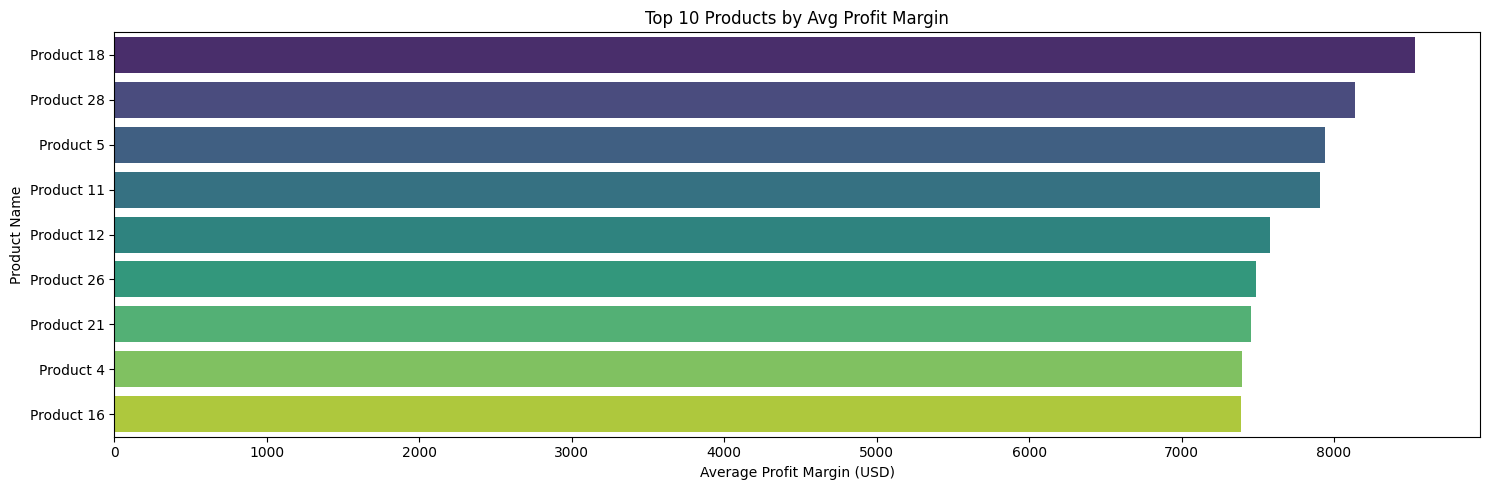

In [ ]:
#Selecting top 10 products by profit
product_profit = df.groupby('product_name')['profit'].mean().sort_values(ascending = False)
product_profit = product_profit[0:9]

#Plotting top 10 products by profit
plt.figure(figsize = (15,5))
sns.barplot(
    x=product_profit.values,    # X-axis: average profit values
    y=product_profit.index,     # Y-axis: product names
    palette='viridis'       # Color palette for the bars
)
plt.title('Top 10 Products by Avg Profit Margin')
plt.xlabel('Average Profit Margin (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

**Insights**  
Product 18 leads in average profitability followed closely by Products 28, 5, and 11, all earning over 7900 USD per unit. The rest of the top products including Products 26, 21, 4, and 16 also show strong and consistent profit margins above 7300 USD. This indicates that these products are high-margin items and could be prioritized in promotions or premium strategies to boost overall profitability.

**5. Sales by Channel**  
Aim: To show distribution of total sales across channels using a pie chart, to identify dominant sales routes.

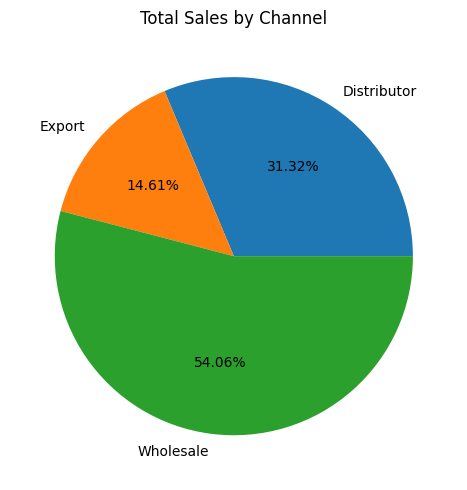

In [ ]:
#Grouping revenue by sales channel
sales_channel = df.groupby('channel')['revenue'].sum()

#Plotting the pie chart
plt.figure(figsize = (5,5))
plt.pie(sales_channel.values,
        labels = sales_channel.index,
        autopct = '%1.2f%%')
plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()

**Insights**  
Wholesale accounts for 54.06% of sales, with distributors at 31.32% and exports at 14.61%, underscoring reliance on domestic bulk channels. To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives through targeted overseas marketing and strategic partner relationships.

**6. Average Order Value Distribution**  
Aim: To understand distribution of order values using a histogram, to identify typical spending levels and outliers

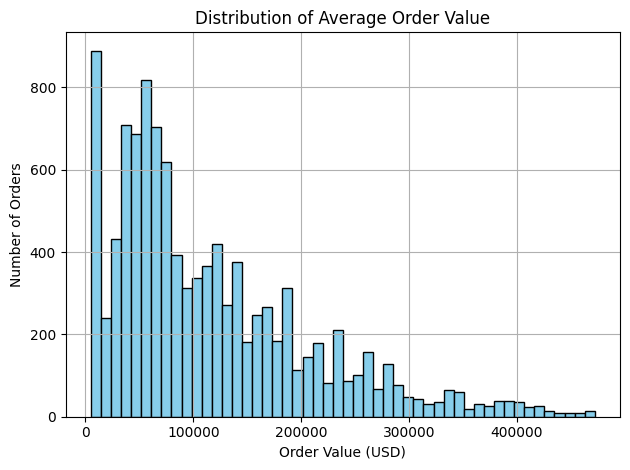

In [ ]:
#Calculate the total revenue for each order number
aov = df.groupby('order_number')['revenue'].sum()

#Plotting the histogram
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.grid(True)
plt.show()

**Insights**  
The order-value distribution is heavily right-skewed, with most orders between 20,000 USD and 120,000 USD. A long tail of high-value transactions extends up toward
500,000 USD but these large orders represent only a small share of total volume.

**7. Profit Margin Percentage vs Unit Price**  
Aim: To examine relationship between unit price and profit margin percentage across orders

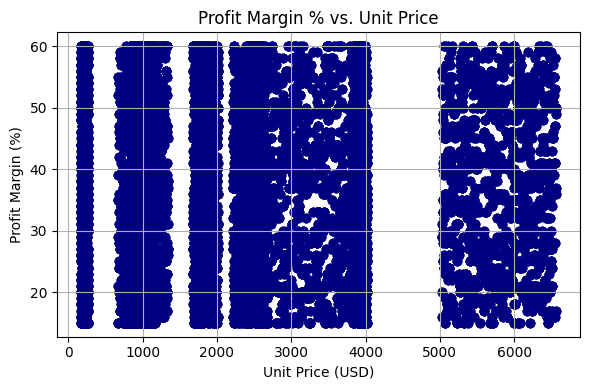

In [ ]:
#Plotting unit price vs profit margin percentage on a scatter plot
plt.figure(figsize=(6,4))
plt.scatter(
    df['unit_price'],
    df['profit_margin_percentage'],
    alpha=0.6,
    color='navy'
)
plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights**  
Most products have profit margins between 18% and 60%, regardless of their unit price, which ranges from 0 to 6,500 USD. The margins form clear bands, suggesting consistent pricing strategies across different price levels. However, a few products with margins below 18%, both at low and high prices may point to cost inefficiencies or pricing issues that need further review.

**8. Unit Price Distribution per Product**  
Aim: To compare pricing variability across different products using the boxplot, to identify price consistency and outliers

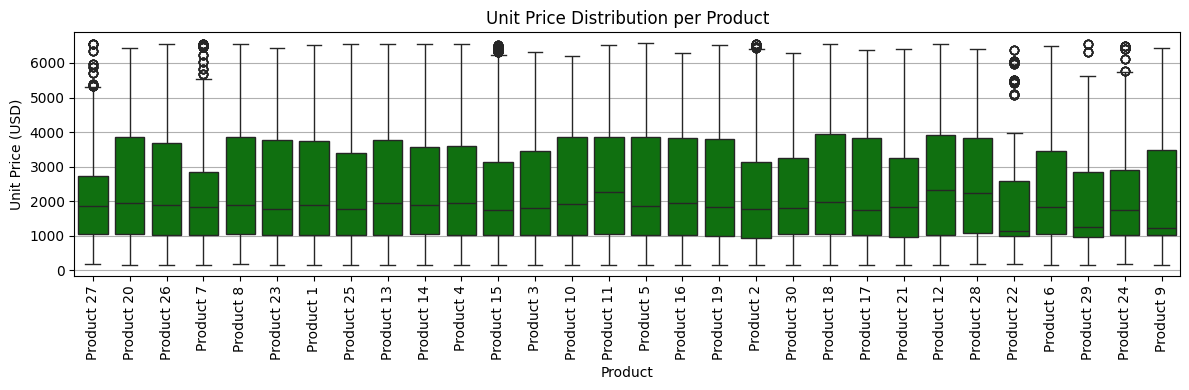

In [ ]:
#Plotting the boxplot
plt.figure(figsize=(12,4))
plt.grid(True)
sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    color='g'
)
plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights**  
Several products such as Products 27, 24, and 28, show unusually high unit prices, likely due to premium offers or bulk sales. Products 27 and 20 also have low-price outliers, possibly from discounts or trial offers. Most products fall within a similar price range, indicating a consistent pricing strategy.
To ensure accurate analysis, it's recommended to exclude these outliers and review whether such pricing variations should be part of regular strategy

**9. Total Sales by Region**  
Aim: To compare total sales across U.S. regions to identify top-performing markets and areas for targeted growth.

/tmp/ipython-input-28-1928843309.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


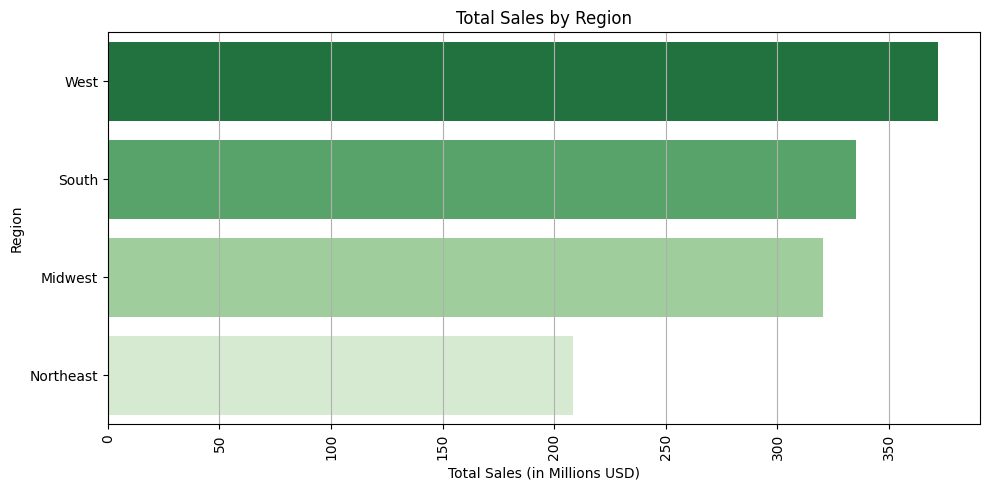

In [ ]:
#Aggregating total sales by region (in millions)
region_sales = (
    df
    .groupby('region')['revenue']
    .sum()
    .sort_values(ascending=False)
    / 1e6
)

#Plotting the horizontal bar chart
plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'
)
plt.title('Total Sales by Region')
plt.xlabel('Total Sales (in Millions USD)')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

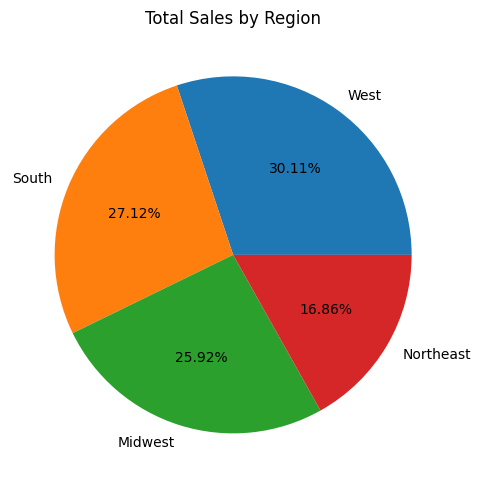

In [ ]:
#Plotting the pie chart
plt.figure(figsize = (5,5))
plt.pie(region_sales.values,
        labels = region_sales.index,
        autopct = '%1.2f%%')
plt.title('Total Sales by Region')
plt.tight_layout()
plt.show()

**Insights**  
The West leads with about 370 million USD in sales, making up 30% of the total, showing strong market dominance. South and Midwest follow closely with over 320 million USD each, reflecting steady demand. The Northeast lags behind at around 210 million USD, suggesting room for growth. Focusing on local promotions and partnerships in the Northeast could help close the gap while continuing success in other regions.

**10. Top 10 states by revenue and order count**  
Aim: To identify highest revenue generating states and compare their order volumes

/tmp/ipython-input-30-1479089498.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


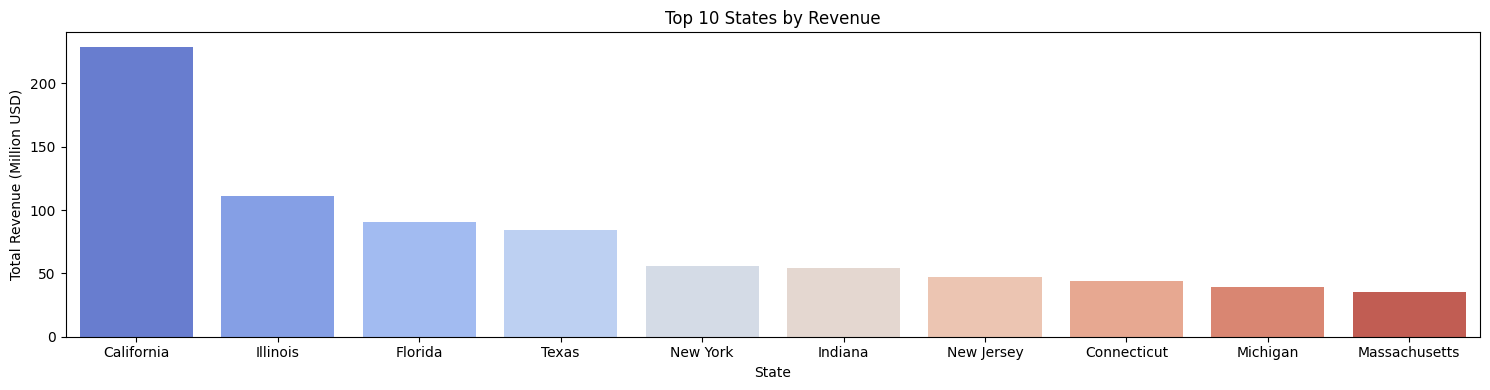

/tmp/ipython-input-30-1479089498.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


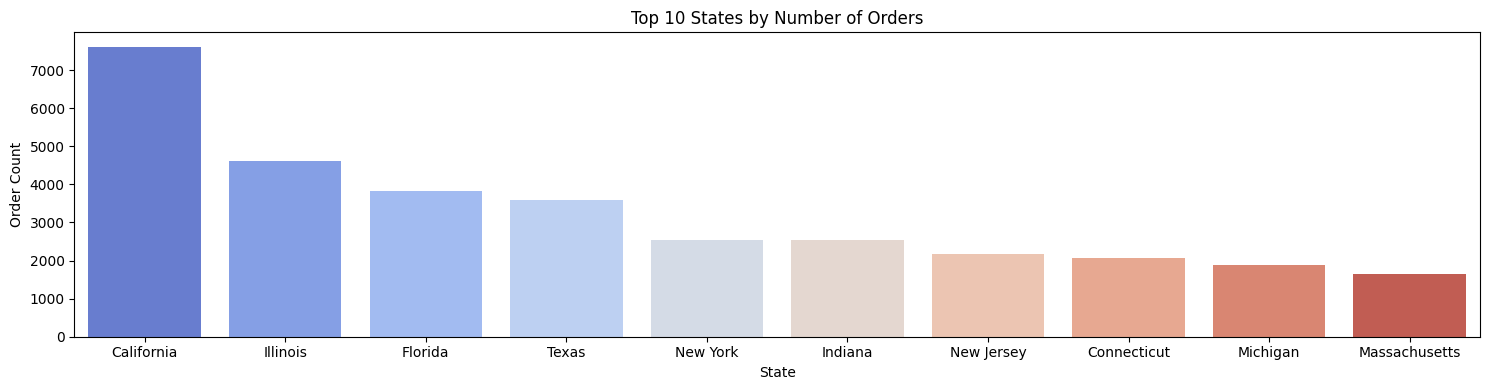

In [ ]:
#Aggregating total revenue and unique order count per state
#And selecting top 10 states
state_rev = df.groupby('state').agg(revenue=('revenue', 'sum'),
    orders=('order_number', 'nunique')).sort_values('revenue', ascending=False)
state_rev = state_rev[0:10]

#Plot 1: Top 10 states by revenue (millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['revenue'] / 1e6,
    palette='coolwarm'
)
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue (Million USD)')
plt.tight_layout()
plt.show()

#Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['orders'],
    palette='coolwarm'
)
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

**Insights**  
California clearly leads all states in both total revenue and number of orders, indicating a strong and consistent customer base. Illinois, Florida, and Texas follow, showing a balanced mix of high sales and order volume. States like New York and Indiana maintain steady performance, while others such as Massachusetts and Michigan contribute smaller shares. The strong correlation between order count and revenue suggests that boosting order volume in lower-performing states could be a key growth strategy.

**11. Average Profit Margin by Channel**  
Aim: To compare average profit margins across sales channels to identify the most and least profitable routes.

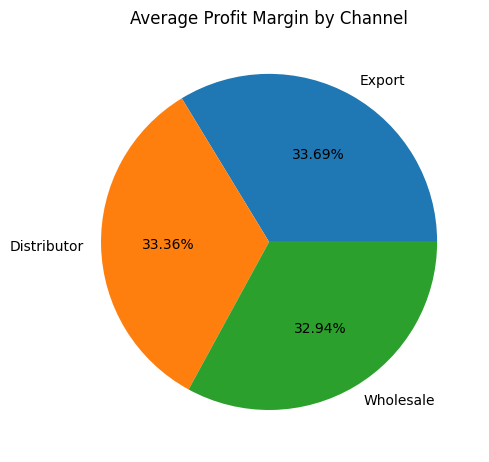

In [ ]:
#Computing average profit margin percentage for each channel
channel_margin = df.groupby('channel')['profit_margin_percentage'].mean().sort_values(ascending = False)

#Plotting the pie chart
plt.figure(figsize = (5,5))
plt.pie(channel_margin.values,
        labels = channel_margin.index,
        autopct = '%1.2f%%')
plt.title('Average Profit Margin by Channel')
plt.tight_layout()
plt.show()


**Insights**   
The average profit margin is fairly consistent across all three channels—Export (33.69%), Distributor (33.36%), and Wholesale (32.94%). This indicates a well-balanced pricing strategy with minimal variation in profitability between channels, suggesting that no single channel significantly outperforms or underperforms in terms of margin.

**12. Top 10 and bottom 10 customers by revenue**  
Aim: To identify highest and lowest revenue customers to tailor engagement strategies

/tmp/ipython-input-32-953423028.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-32-953423028.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


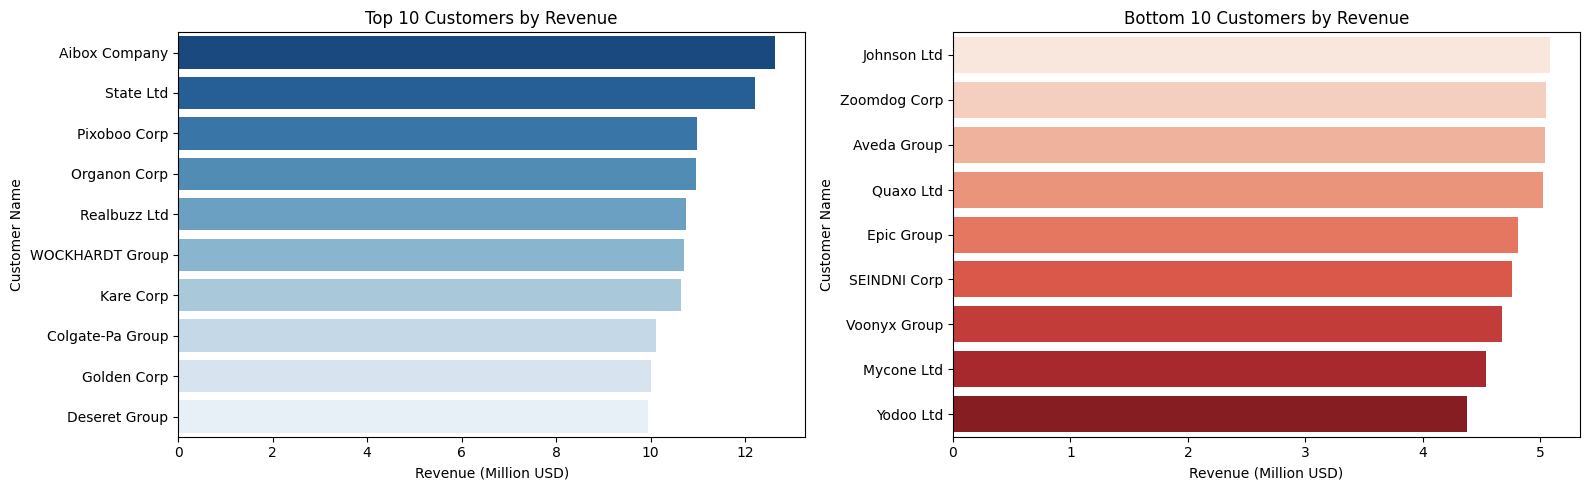

In [ ]:
#Calculating total revenue per customer and selecting top and bottom 10
top_rev = df.groupby('customer_names')['revenue'].sum().sort_values(ascending=False)
bottom_rev = top_rev[-10:-1]
top_rev = top_rev[0:10]

#Creating a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

#Plot 1: Top 10 customers by revenue (millions)
sns.barplot(
    x=top_rev.values / 1e6,
    y=top_rev.index,
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title('Top 10 Customers by Revenue')
axes[0].set_xlabel('Revenue (Million USD)')
axes[0].set_ylabel('Customer Name')

#Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6,
    y=bottom_rev.index,
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Customers by Revenue')
axes[1].set_xlabel('Revenue (Million USD)')
axes[1].set_ylabel('Customer Name')

plt.tight_layout()
plt.show()

**Insights**  
The chart shows that Aibox Company and State Ltd are the top revenue generating customers, each contributing over 12 million USD. The top 10 customers all generate above 10 million USD. This is indicating strong reliance on a few high value clients. In contrast, the bottom 10 customers contribute around 4-5 million USD each, showing a sharp revenue gap. This highlights the need to retain top clients while nurturing lower tier customers to reduce revenue concentration and ensure balanced growth.

**13. Customer Segmentation: Revenue vs Profit Margin**   
Aim: To segment customers by total revenue and average profit margin, highlighting order volume.

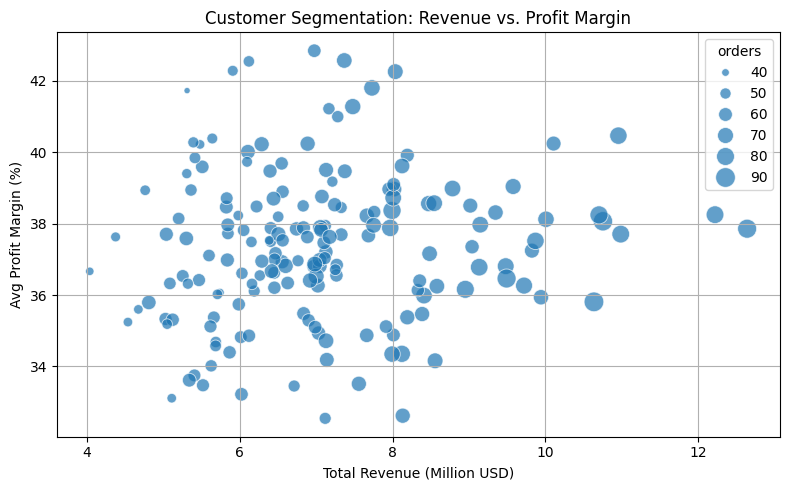

In [ ]:
#Aggregating  metrics per customer
cust_summary = df.groupby('customer_names').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_percentage', 'mean'),
    orders=('order_number', 'nunique')
)
cust_summary['total_revenue'] = cust_summary['total_revenue'] / 1e6

#Plotting the bubble chart:
plt.figure(figsize=(8, 5))
plt.grid(True)
sns.scatterplot(
    data=cust_summary,
    x='total_revenue',
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')
plt.ylabel('Avg Profit Margin (%)')
plt.tight_layout()
plt.show()

**Insights:**  
The chart shows that customers earning over 10 million USD in revenue maintain steady profit margins between 36-40%. This that high sales does not reduce profitability. Most customers fall in the 6-10 million USD range with stable margins around 34-40%. Smaller customers (below 6 million USD) show the most variation in margins, likely due to inconsistent pricing or costs. Larger bubbles (more orders) appear with higher revenue, but profit margin stays mostly unaffected. This makes revenue the key driver of value.

**14. Correlation Heatmap of Numeric Features**  
Aim: To identify relationships among key numeric variables to uncover potential multicollinearity.

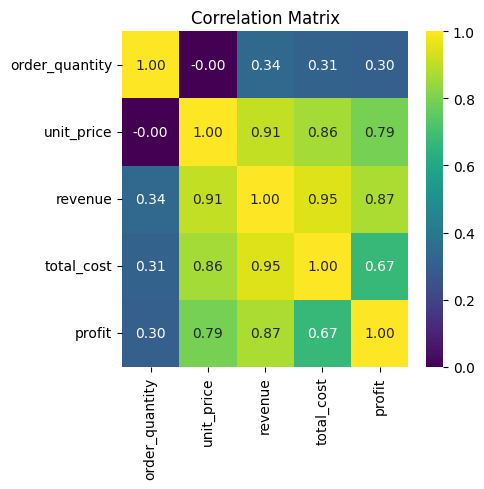

In [ ]:
#List of numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

#Calculating the correlation matrix for these numeric features
corr = df[num_cols].corr()

#Plotting the heatmap
plt.figure(figsize=(5,5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Insights:**  
The analysis reveals a strong positive correlation between revenue and profit (0.87), indicating that higher sales revenue typically leads to higher profitability. Unit price emerges as a key driving factor, showing strong correlations with revenue (0.91), profit (0.79), and total cost (0.86), underscoring its impact on both earnings and expenses. In contrast, order quantity exhibits only weak correlations with revenue (0.34) and profit (0.30), suggesting that pricing strategies have a greater influence on financial performance than sales volume.

#Key Insights and Recommendations

**Key Insights**
1. Revenue Pattern:
Revenue remained consistent around USD 26M across years, with predictable peaks in May, August, and Q4. A sharp dip in early 2017 (USD 21M) stands out as a possible disruption.

2. Sales Channels:
Sales are dominated by Wholesale (54%), followed by Distributors (31%) and Exports (15%), suggesting scope for international market expansion.

3. Top Revenue Products:
Top revenue products are  Product 26 (USD 117M) and Product 25 (USD 109M).Others range between USD 51M–78M.
Revenue drops significantly after the top two, showing high product concentration.

4. Profitability Insights:
Profit margins span 18%–60%, with no strong link to unit price, suggesting standardized pricing across product tiers.

5. Customer Contribution:
Aibox Company leads with USD 12.2M. Revenue from customers drops sharply beyond the top few, showing high dependence on top clients.

6. Regional Performance:
West region leads with USD 360M (35%), followed by South & Midwest: USD 320M+ (32%) each. Northeast trails at USD 210M (20%), pointing to untapped potential.

7. Correlation Summary:
Unit price strongly drives revenue (0.91) and cost (0.94). Quantity has weak correlation with revenue/profit, indicating volume isn’t a major factor.

**Recommendations**

1. Focus on Outliers:
Exclude or separately track bulk/promo orders to avoid skewed averages.

2. Margin Optimization:
Apply pricing strategies from top products to uplift mid- and low-tier performers and cut costs on underperformers.

3. Expand International Reach:
Strengthen export partnerships and implement targeted overseas marketing campaigns.

4. Regional Growth Plan:
Focus on closing the revenue gap in the Northeast through localized promotions and strategic alliances.

5. Customer Strategy:
Retain top customers with loyalty programs and upselling, while targeting mid-tier clients for growth.